# Load Datasets

In [0]:
# At first Mount Drive for accessing Datasets.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd             #####  After run this block, i move into those block where all csv concatenate into single csv this csv are in filter form.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score
import gc
from collections import Counter
import warnings
import xgboost
import random
from scipy.stats import randint
import time
warnings.filterwarnings("ignore")

Read all CSV present in IDS_2018 Dataset.

In [0]:
# Friday-WorkingHours-Afternoon dataframe
ids_df=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
ids_df.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,...,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,110091.7431,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,...,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [0]:
# Friday-WorkingHours-Afternoon-PortScan DataFrame
ids_df1=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
ids_df1.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,2664,6954,456,0,64.97561,109.864573,976,0,158.045455,312.67525,7595.10464,67.12246771,15075.50000,104051.3997,948537.0,0.0,1266342.0,31658.550,159355.2595,996324.0,2.0,317671.0,7387.697674,19636.44809,104616.0,1.0,0,0,0,0,...,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.97561,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,2664,6954,456,0,64.97561,109.864573,976,0,158.045455,312.67525,7289.93681,64.42551766,15706.58333,104861.8701,955790.0,1.0,1319353.0,32983.825,159247.9008,996423.0,1.0,363429.0,8451.837209,21337.26261,104815.0,1.0,0,0,0,0,...,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.97561,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [0]:
# Friday-WorkingHours-Morning DataFrame
ids_df2=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Friday-WorkingHours-Morning.pcap_ISCX.csv')
ids_df2.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-3268-56108-6,192.168.10.50,56108,192.168.10.3,3268,6,7/7/2017 8:59,112740690,32,16,6448,1152.0,403,0,201.5,204.724205,72,72,72.0,0.0,67.41133126,0.425755776,2398738.085,5798697.94,16400000.0,3.0,113000000.0,3636796.452,6848760.823,16400000.0,3.0,113000000.0,7516023.200,8323384.915,16400000.0,3.0,1,0,0,0,...,403,163.326531,178.931713,32016.55782,0,1,0,0,1,0,0,0,0,166.729167,201.5,72.0,1024,0,0,0,0,0,0,32,6448,16,1152,377,2079,15,32,359.428571,11.998016,380.0,343.0,16100000.0,498804.8203,16400000.0,15400000.0,BENIGN
1,192.168.10.3-192.168.10.50-389-42144-6,192.168.10.50,42144,192.168.10.3,389,6,7/7/2017 8:59,112740560,32,16,6448,5056.0,403,0,201.5,204.724205,316,316,316.0,0.0,102.0395854,0.425756267,2398735.319,5798709.67,16400000.0,2.0,113000000.0,3636792.258,6848776.836,16400000.0,2.0,113000000.0,7516016.133,8323376.147,16400000.0,4.0,1,0,0,0,...,403,243.000000,174.716914,30526.00000,0,1,0,0,1,0,0,0,0,248.062500,201.5,316.0,1024,0,0,0,0,0,0,32,6448,16,5056,955,2079,15,32,320.285714,15.744992,330.0,285.0,16100000.0,498793.6656,16400000.0,15400000.0,BENIGN


In [0]:
# Monday-WorkingHours DataFrame
ids_df3=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Monday-WorkingHours.pcap_ISCX.csv')
ids_df3.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,4,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,3000000.0,500000.0,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80,192.168.10.5,49188,6,03/07/2017 08:55:58,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.2E7,2000000.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [0]:
# Thursday-WorkingHours-Afternoon-Infilteration DataFrame
ids_df4=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
ids_df4.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.12,60148,192.168.10.50,22,6,6/7/2017 1:00,166,1,1,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,12048.19277,166.0,0.000000,166.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.12-192.168.10.50-60148-22-6,192.168.10.50,22,192.168.10.12,60148,6,6/7/2017 1:00,83,1,2,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,36144.57831,41.5,10.606602,49.0,34.0,0.0,0.0,0.0,0.0,0.0,49.0,49.0,0.0,49.0,49.0,0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [0]:
# Thursday-WorkingHours-Morning-WebAttacks DataFrame
ids_df5=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='unicode_escape')
ids_df5.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,9668.0,10012.0,403.0,0.0,201.416667,203.548293,923.0,316.0,417.166667,231.080951,174.0122825,0.636630302,1592893.873,4597264.595,16500000.0,3.0,113000000.0,2406286.489,5491986.114,16500000.0,3.0,113000000.0,4917177.522,7084368.263,16500000.0,3.0,1.0,0.0,0.0,0.0,...,923.0,275.109589,233.833248,54677.98782,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,278.930556,201.416667,417.166667,1536.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,9668.0,24.0,10012.0,571.0,2079.0,23.0,32.0,203985.500,575837.2562,1629110.0,379.0,13800000.0,4277541.062,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,11364.0,12718.0,403.0,0.0,167.117647,171.919413,1139.0,126.0,317.950000,208.261294,212.2253767,0.95176234,1060501.925,3813685.451,16500000.0,2.0,113000000.0,1693637.403,4719143.265,16500000.0,2.0,113000000.0,2908399.744,5922355.273,16500000.0,3.0,1.0,0.0,0.0,0.0,...,1139.0,224.633027,198.999612,39600.84557,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,226.712963,167.117647,317.950000,2176.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,11364.0,40.0,12718.0,390.0,2081.0,39.0,32.0,178326.875,503426.9460,1424245.0,325.0,13800000.0,4229413.120,16500000.0,6945512.0,BENIGN


In [0]:
# Tuesday-WorkingHours DataFrame
ids_df6=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Tuesday-WorkingHours.pcap_ISCX.csv')
ids_df6.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,440,358.0,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875,17187.5,64.0,135.557286,445.0,1.0,640.0,106.666667,194.325157,497.0,1.0,538.0,179.333333,303.686242,530.0,4.0,0,0,0,0,...,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.5-88-49183-6,192.168.10.5,49183,192.168.10.3,88,6,4/7/2017 8:54,900,9,4,600,2944.0,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.44444,75.0,192.795228,684.0,1.0,900.0,112.500000,252.411229,734.0,1.0,766.0,255.333333,435.323251,758.0,3.0,0,0,0,0,...,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [0]:
# Wednesday-workingHours DataFrame
ids_df7=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/Wednesday-workingHours.pcap_ISCX.csv')
ids_df7.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,6,6.0,6,6,6.000000,0.000000,6,6,6.0,0.000000,313.250496,52.208416,38308.000000,0.000000,38308.0,38308.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,...,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000,6.000000,6.0,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,172,326.0,79,0,15.636364,31.449238,163,0,65.2,89.278777,1039665.971,33402.92276,31.933333,25.510409,73.0,0.0,479.0,47.9,38.942836,109.0,1.0,401.0,100.25,101.736178,237.0,3.0,0,0,0,0,...,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125,15.636364,65.2,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


###Concatenation of all DataFrame into a Single DataFrame

In [0]:
# Here IDS is a Single DataFrame
ids=pd.concat([ids_df,ids_df1,ids_df2,ids_df3,ids_df4,ids_df5,ids_df6,ids_df7])
ids.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443.0,192.168.10.5,54865.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4000000,666666.6667,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80.0,192.168.10.5,55054.0,6.0,7/7/2017 3:30,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,110091.7431,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [0]:
ids.keys()

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [0]:
# Delete Permanentally
del [ids_df,ids_df1,ids_df2,ids_df3,ids_df4,ids_df5,ids_df6,ids_df7]
gc.collect()

11

In [0]:
gc.collect()

11

# Data Preprocessing & Analysis

###1) Handling NULL Values & Infinity Values

In [0]:
# Before preprocessing shape of Datasets
print('Before removing Null values, shape of IDS Datasets is : ',ids.shape)
ids.isnull().sum()

Before removing Null values, shape of IDS Datasets is :  (3119345, 85)


Flow ID              288602
 Source IP           288602
 Source Port         288602
 Destination IP      288602
 Destination Port    288602
                      ...  
Idle Mean            288602
 Idle Std            288602
 Idle Max            288602
 Idle Min            288602
 Label               288602
Length: 85, dtype: int64

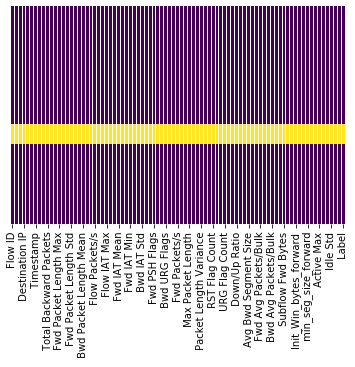

In [0]:
sns.heatmap(ids.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
ids.dropna(how='all',inplace=True)
print('After removing Null values, shape of IDS datasets is : ',ids.shape)

After removing Null values, shape of IDS datasets is :  (2830743, 85)


In [0]:
print('After removing Null values present in row wise, some Null values are left')
ids.isnull().sum().sum()

After removing Null values present in row wise, some Null values are left


1358

In [0]:
ids.replace([np.inf, -np.inf,np.nan],0.0, inplace=True)
#ids.replace(np.nan,0.0, inplace=True)
ids.isnull().sum()
print('After removing All NULL values : ',ids.isnull().sum().sum())
gc.collect()

After removing All NULL values :  0


11

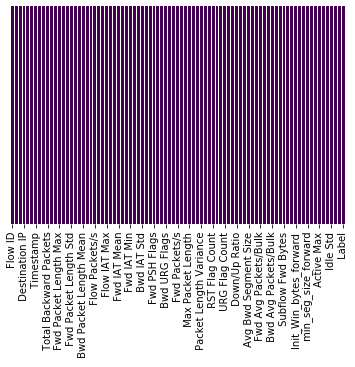

In [0]:
sns.heatmap(ids.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###2) Handing Object types of Columns & Convert it into Float64 types

In [0]:
# I have 85 column present in IDS Dataset in which 78 columns float64 & 7 columns object types.
ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 85 columns):
Flow ID                         object
 Source IP                      object
 Source Port                    float64
 Destination IP                 object
 Destination Port               float64
 Protocol                       float64
 Timestamp                      object
 Flow Duration                  float64
 Total Fwd Packets              float64
 Total Backward Packets         float64
Total Length of Fwd Packets     float64
 Total Length of Bwd Packets    float64
 Fwd Packet Length Max          float64
 Fwd Packet Length Min          float64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max           float64
 Bwd Packet Length Min          float64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    object
 Flow Packets/s                 object
 Flow IAT Mean

In [0]:
# At first 'Source Ip' & 'Destination Ip' convert into Float64 types
import socket, struct
arr=ids[' Source IP'].to_numpy()
arr1=ids[' Destination IP'].to_numpy()
l=[]
l1=[]
for ip in range(len(arr)):
  l.append(struct.unpack("!L", socket.inet_aton(arr[ip])))
  l1.append(struct.unpack("!L", socket.inet_aton(arr1[ip])))

In [0]:
# Convert array into DataFrame
d=pd.DataFrame(l)
d.columns=[' Source IP']
d1=pd.DataFrame(l1)
d1.columns=[' Destination IP']

ids[' Source IP']=d
ids[' Destination IP']=d1
ids[' Source IP']=ids[' Source IP'].astype('float64')
ids[' Destination IP']=ids[' Destination IP'].astype('float64')

In [0]:
# After that 'Flow Bytes/s' & ' Flow Packets/s' convert into Float64 Types
ids['Flow Bytes/s']=ids['Flow Bytes/s'].astype('float64')
ids[' Flow Packets/s']=ids[' Flow Packets/s'].astype('float64')

In [0]:
# After that ' Timestamp' convert into datetime then again convert it into Float64 Types
from datetime import datetime
ids[' Timestamp']=pd.to_datetime(ids[' Timestamp'])
ids[' Timestamp']=ids[' Timestamp'].values.astype('float64')

In [0]:
# Drop 'Flow ID' columns because its Data
ids.drop('Flow ID',axis=1,inplace=True)

In [0]:
# No. of Target present in " Label" column are followings
ids.groupby(' Label').first()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,1.745932e+09,443.0,3.232238e+09,54865.0,6.0,1.499398e+18,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000e+00,0.000000e+00,3.0,3.0,3.0,3.000000e+00,0.000000e+00,3.0,3.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,40.0,...,6.0,6.0,6.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.000000,6.000000,0.000000,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Bot,2.886730e+09,42544.0,3.232238e+09,8080.0,6.0,1.499420e+18,60202640.0,9.0,9.0,322.0,256.0,322.0,0.0,35.777778,107.333333,256.0,0.0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000.0,47.0,51200000.0,6.396442e+06,5.268490e+06,10200000.0,234.0,60200000.0,7.518954e+06,4.645137e+06,10300000.0,637.0,0.0,0.0,0.0,0.0,296.0,...,0.0,322.0,30.421053,91.783753,8.424257e+03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,32.111111,35.777778,28.444444,296.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,322.0,9.0,256.0,29200.0,110.0,1.0,32.0,63678.2,22252.53596,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0
DDoS,2.886730e+09,49650.0,3.232238e+09,80.0,6.0,1.499400e+18,1293792.0,3.0,7.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,5840.0,0.0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730.0,2.0,747.0,3.735000e+02,5.239661e+02,744.0,3.0,1293746.0,2.156243e+05,5.276719e+05,1292730.0,2.0,0.0,0.0,0.0,0.0,72.0,...,0.0,5840.0,1057.545455,1853.437529,3.435231e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1163.300000,8.666667,1658.142857,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,7.0,11607.0,8192.0,229.0,2.0,20.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS GoldenEye,2.886730e+09,58958.0,3.232238e+09,80.0,6.0,1.494155e+18,5008837.0,4.0,5.0,341.0,3525.0,341.0,0.0,85.250000,170.500000,2077.0,0.0,705.000000,990.644740,7.718359e+02,1.796824,6.261046e+05,1.768253e+06,5002306.0,47.0,6531.0,2.177000e+03,4.969145e+02,2615.0,1637.0,5008656.0,1.252164e+06,2.500883e+06,5003487.0,49.0,0.0,0.0,0.0,0.0,136.0,...,0.0,2077.0,386.600000,747.760984,5.591465e+05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,429.555556,85.250000,705.000000,136.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,341.0,5.0,3525.0,29200.0,235.0,1.0,32.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Hulk,2.886730e+09,50748.0,3.232238e+09,80.0,6.0,1.494154e+18,1878.0,3.0,6.0,382.0,11595.0,382.0,0.0,127.333333,220.547803,4355.0,0.0,1932.500000,2182.468304,6.377529e+06,4792.332268,2.347500e+02,2.291299e+02,577.0,15.0,975.0,4.875000e+02,2.651650e+02,675.0,300.0,1780.0,3.560000e+02,3.997881e+02,950.0,15.0,0.0,0.0,0.0,0.0,10

In [0]:
#ids=ids.to_csv('/content/drive/My Drive/IDS/TrafficLabelling_/IDS.csv')

In [0]:
####### Filter Data store in one place. I can run first two line then start from this line.
ids=pd.read_csv('/content/drive/My Drive/IDS/TrafficLabelling_/IDS.csv')
ids.head(2)

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,1.745932e+09,443.0,3.232238e+09,54865.0,6.0,1.499398e+18,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1,1.745886e+09,80.0,3.232238e+09,55054.0,6.0,1.499398e+18,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [0]:
ids.drop(['Unnamed: 0'],axis=1,inplace=True)
ids.shape

(2830743, 84)

In [0]:
def sample_data():
  B=ids.loc[ids[' Label']=='BENIGN'].iloc[:1500]
  Bo=ids.loc[ids[' Label']=='Bot'].iloc[:1500]
  Dd=ids.loc[ids[' Label']=='DDoS'].iloc[:1500]
  Dg=ids.loc[ids[' Label']=='DoS GoldenEye'].iloc[:1500]
  Dh=ids.loc[ids[' Label']=='DoS Hulk'].iloc[:1500]
  Ds=ids.loc[ids[' Label']=='DoS Slowhttptest'].iloc[:1500]
  Dss=ids.loc[ids[' Label']=='DoS slowloris'].iloc[:1500]
  Ftp=ids.loc[ids[' Label']=='FTP-Patator'].iloc[:1500]
  Ht=ids.loc[ids[' Label']=='Heartbleed'].iloc[:11]
  Inf=ids.loc[ids[' Label']=='Infiltration'].iloc[:36]
  Port=ids.loc[ids[' Label']=='PortScan'].iloc[:1500]
  Ss=ids.loc[ids[' Label']=='SSH-Patator'].iloc[:1500]
  Web_B=ids.loc[ids[' Label']=='Web Attack  Brute Force'].iloc[:1500]
  Web_S=ids.loc[ids[' Label']=='Web Attack  Sql Injection'].iloc[:21]
  Web_X=ids.loc[ids[' Label']=='Web Attack  XSS'].iloc[:652]
  ids_sample=pd.concat([B,Bo,Dd,Dg,Dh,Ds,Dss,Ftp,Ht,Inf,Port,Ss,Web_B,Web_S,Web_X])
  return ids_sample

In [0]:
ids1=sample_data()

In [0]:
#Copy of IDS dataframe after convert all object type columns into float64 except one i.e Target(' Label').
ids_copy=ids1.copy()

In [0]:
# Multi_class Classifier     
dict1={'BENIGN':0,'Bot':1,'DDoS':2,'DoS GoldenEye':3,'DoS Hulk':4,'DoS Slowhttptest':5,'DoS slowloris':6,'FTP-Patator':7,'Heartbleed':8,'Infiltration':9,
       'PortScan':10,'SSH-Patator':11,'Web Attack  Brute Force':12,'Web Attack  Sql Injection':13,'Web Attack  XSS':14}

ids1.replace({' Label':dict1},inplace=True)  # Convert Label into dict(key,values)
ids1[' Label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [0]:
# Binary_class Classifier(Benign,Malacious)
dict2={'BENIGN':0,'Bot':1,'DDoS':1,'DoS GoldenEye':1,'DoS Hulk':1,'DoS Slowhttptest':1,'DoS slowloris':1,'FTP-Patator':1,'Heartbleed':1,'Infiltration':1,
       'PortScan':1,'SSH-Patator':1,'Web Attack  Brute Force':1,'Web Attack  Sql Injection':1,'Web Attack  XSS':1}

ids_copy.replace({' Label':dict2},inplace=True)  # Convert Label into dict(key,values)
ids_copy[' Label'].unique()

array([0, 1])

In [0]:
gc.collect()

4

# Multi_class classifier

# Feature Scaling apply on IDS Datasets

###1) Split Datasets into Independent & Dependent Columns

In [0]:
ids1.replace([np.inf,-np.inf,np.nan],0.0,inplace=True)

In [0]:
X=ids1[ids1.columns[0:-1]]
y=ids1[ids1.columns[-1]]
print('Shape of Independent Datasets : ',X.shape)
print('Shape of Dependent Datasets : ',y.shape)

Shape of Independent Datasets :  (17220, 83)
Shape of Dependent Datasets :  (17220,)


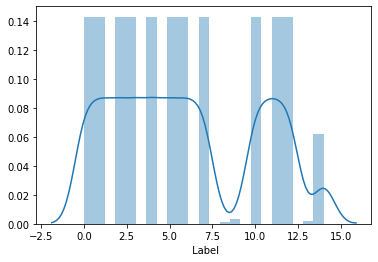

In [0]:
sns.distplot(y)

###2) Scaling data using MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler=Scaler()
scaler.fit(X)
ids_scaled=scaler.transform(X)
X_new=pd.DataFrame(data=ids_scaled)
X_new.columns=[' Source IP', ' Source Port', ' Destination IP',' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',' Total Fwd Packets',
             ' Total Backward Packets','Total Length of Fwd Packets', ' Total Length of Bwd Packets',' Fwd Packet Length Max', ' Fwd Packet Length Min',
             ' Fwd Packet Length Mean', ' Fwd Packet Length Std','Bwd Packet Length Max', ' Bwd Packet Length Min',' Bwd Packet Length Mean', 
             ' Bwd Packet Length Std', 'Flow Bytes/s',' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',' Flow IAT Min', 
             'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',' Bwd IAT Std', 
             ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',' Fwd Header Length', 
             ' Bwd Header Length', 'Fwd Packets/s',' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',' Packet Length Mean', 
             ' Packet Length Std', ' Packet Length Variance','FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',' PSH Flag Count', ' ACK Flag Count', 
             ' URG Flag Count',' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio',' Average Packet Size', ' Avg Fwd Segment Size',' Avg Bwd Segment Size', 
             ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk', 
             'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes','Init_Win_bytes_forward', 
             ' Init_Win_bytes_backward',' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',' Active Std', ' Active Max', ' Active Min', 'Idle Mean', 
             ' Idle Std',' Idle Max', ' Idle Min']
X_new.head(2)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.447411,0.006760,0.751589,0.839055,0.352941,0.996518,2.500100e-08,0.000181,0.000000,0.000004,0.000000e+00,0.000257,0.011538,0.00101,0.0,0.000000,0.000000,0.000000,0.0,0.006483,0.222222,7.371007e-08,0.0,2.586207e-08,3.053435e-07,2.500000e-08,2.777778e-08,0.0,2.586207e-08,2.777778e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000362,...,0.016854,0.000257,0.003338,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.004644,0.00101,0.000000,0.000362,0.0,0.0,0.0,0.0,0.0,0.0,0.000181,0.000004,0.000000,0.000000e+00,0.000519,0.000000,0.000181,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.447398,0.001221,0.751589,0.841946,0.352941,0.996518,9.083698e-07,0.000000,0.000181,0.000002,7.611864e-07,0.000257,0.011538,0.00101,0.0,0.000345,0.014423,0.001373,0.0,0.000178,0.006116,2.678133e-06,0.0,9.396552e-07,8.396946e-06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000181,...,0.016854,0.000257,0.003338,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.004644,0.00101,0.001373,0.000181,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000002,0.000181,7.611864e-07,0.000458,0.003922,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###3) Selection of Features from Datasets

In [0]:
# Implement Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_trans=SelectKBest(score_func=chi2,k=50).fit(X_new,y)
scores=pd.DataFrame(X_trans.scores_)
columns=pd.DataFrame(X_new.columns)
# concat two dataframes for better visualization 
Topfeature= pd.concat([columns,scores],axis=1)
Topfeature.columns=['Column','Score']
print(Topfeature.nlargest(50,'Score'))

                          Column        Score
10   Total Length of Bwd Packets  7922.214863
70             Subflow Bwd Bytes  7922.214863
35                 Fwd PSH Flags  4749.538023
49                SYN Flag Count  4749.538023
53                URG Flag Count  4727.620879
5                      Timestamp  4403.359213
72       Init_Win_bytes_backward  4218.061208
57           Average Packet Size  4074.591212
25                 Fwd IAT Total  4010.421601
45            Packet Length Mean  3978.064168
6                  Flow Duration  3739.596487
17        Bwd Packet Length Mean  3701.417384
59          Avg Bwd Segment Size  3701.417384
18         Bwd Packet Length Std  3610.224579
3               Destination Port  3500.491924
81                      Idle Max  3394.822015
46             Packet Length Std  3306.982131
33                   Bwd IAT Max  3190.369015
28                   Fwd IAT Max  3108.090223
23                  Flow IAT Max  3073.457762
30                 Bwd IAT Total  

In [0]:
X_update=SelectKBest(score_func=chi2,k=50).fit_transform(X_new,y)
print('Top 50 feature selected whose shape is : ',X_update.shape)

Top 50 feature selected whose shape is :  (17220, 50)


275

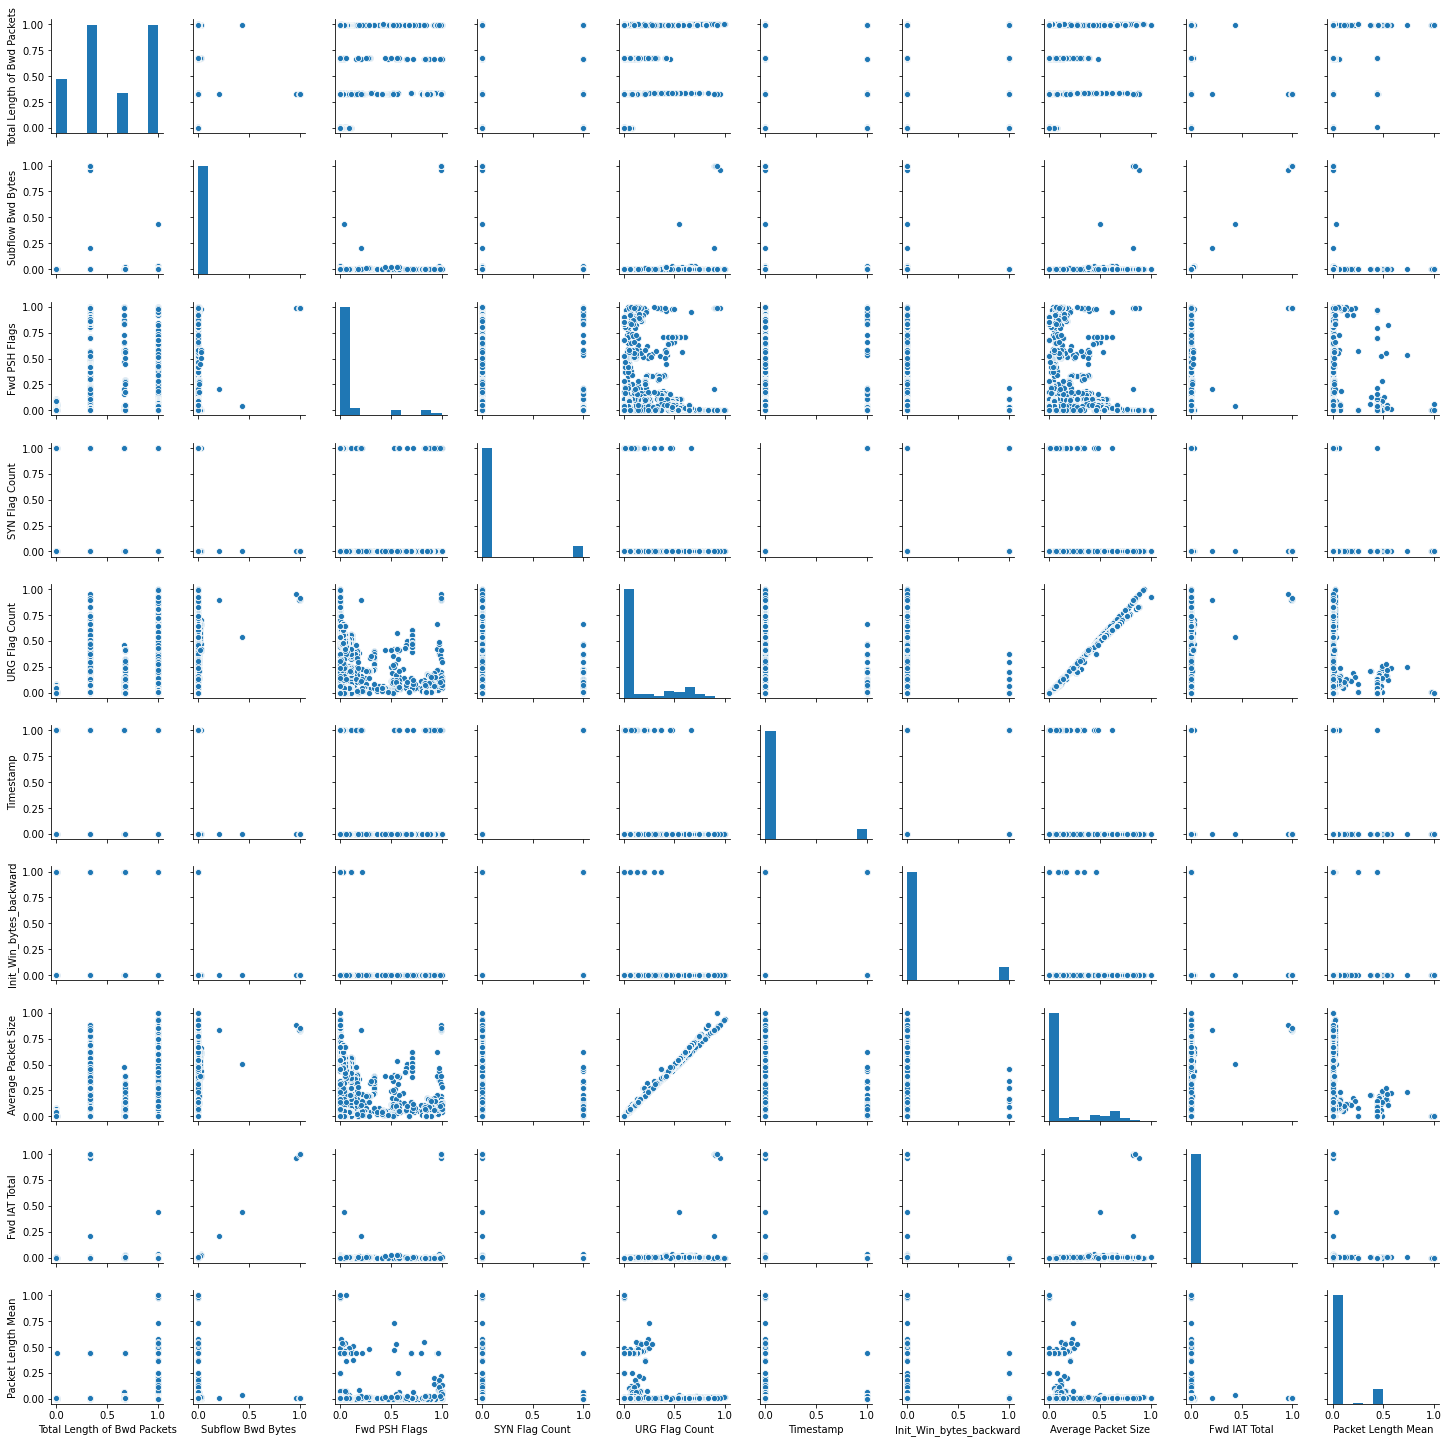

In [0]:
# Selecting Top 10 features for Visulisation Pairplot & Correlation Matrix.
X_new1=SelectKBest(score_func=chi2,k=10).fit_transform(X_new,y)
X_new1=pd.DataFrame(X_new1)
X_new1.columns=['Total Length of Bwd Packets','Subflow Bwd Bytes','Fwd PSH Flags','SYN Flag Count','URG Flag Count','Timestamp','Init_Win_bytes_backward',
                'Average Packet Size','Fwd IAT Total','Packet Length Mean']  
sns.pairplot(X_new1,size=2)
gc.collect()

## Correlation Matrix with Heatmap

#### Correlation states how the features are related to each other or the target variable.
#### Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
#### Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

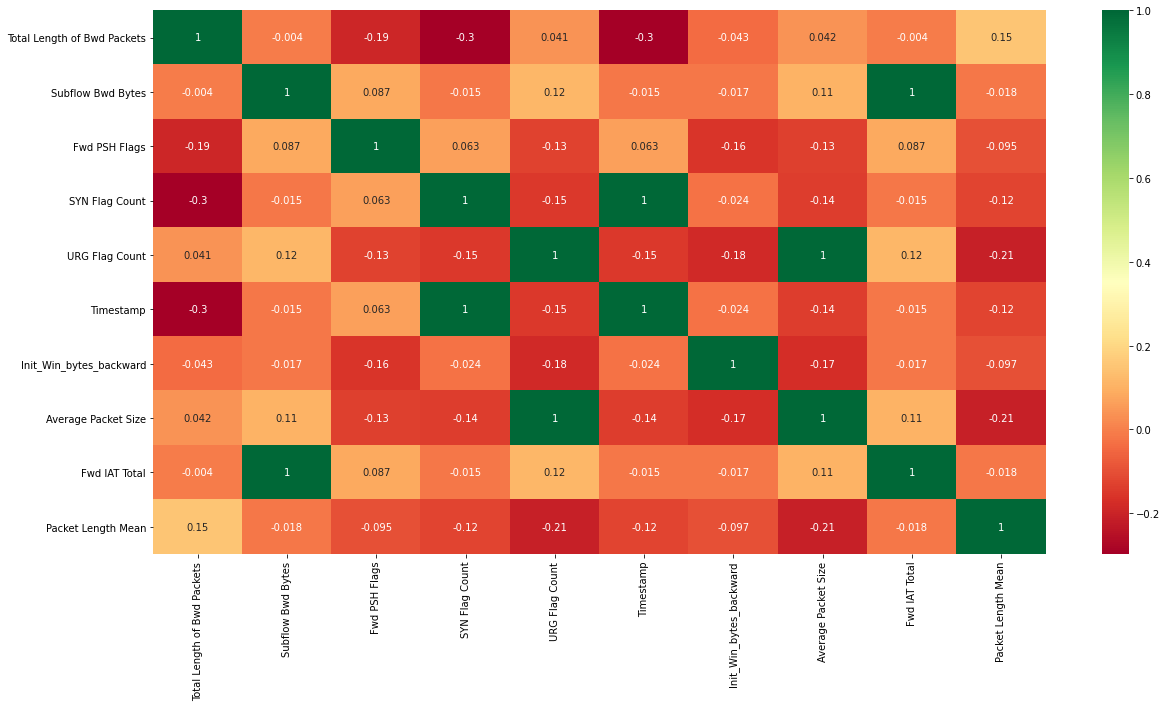

In [0]:
# Correlation Matrix with Heatmap with top 10 Features.
plt.figure(figsize=(20,10))
sns.heatmap(X_new1.corr(),annot=True,cmap="RdYlGn")

# Apply Imbalanced Learning on Datasets

###1) Data Visualization

###a) Multi_class Classifier

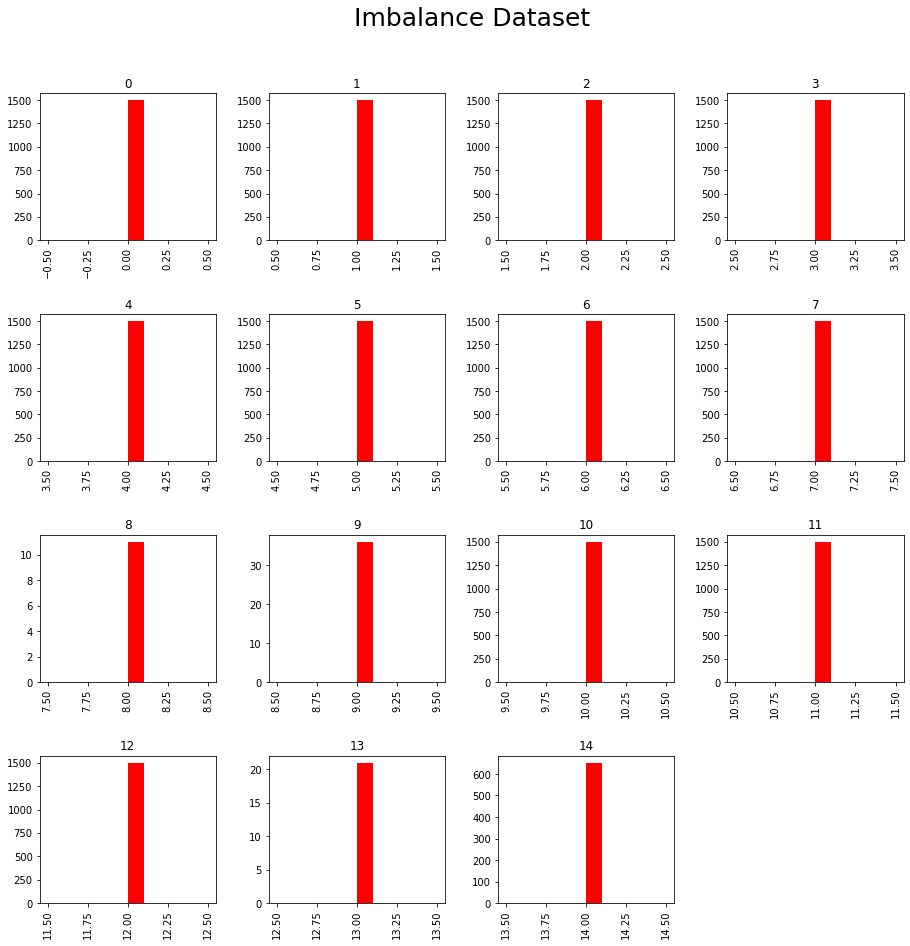

43082

In [0]:
ids1.hist(by=' Label',column=' Label',figsize=(15,15),color='r')
plt.suptitle('Imbalance Dataset',fontsize=25)
plt.show()
gc.collect()

12    1500
11    1500
10    1500
7     1500
6     1500
5     1500
4     1500
3     1500
2     1500
1     1500
0     1500
14     652
9       36
13      21
8       11
Name:  Label, dtype: int64


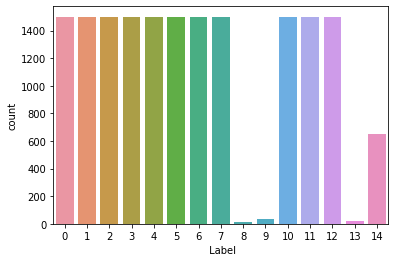

In [0]:
t=sns.countplot(x=' Label',data=ids1)
print(ids1[' Label'].value_counts())

### Random_over Sampling for Balancing Data

In [0]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
ros

RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [0]:
X_smt,y_smt=ros.fit_sample(X_update,y)
df1=pd.DataFrame(y_smt)
df1.columns=[' Label']
df1[' Label'].value_counts()

14    1500
13    1500
12    1500
11    1500
10    1500
9     1500
8     1500
7     1500
6     1500
5     1500
4     1500
3     1500
2     1500
1     1500
0     1500
Name:  Label, dtype: int64

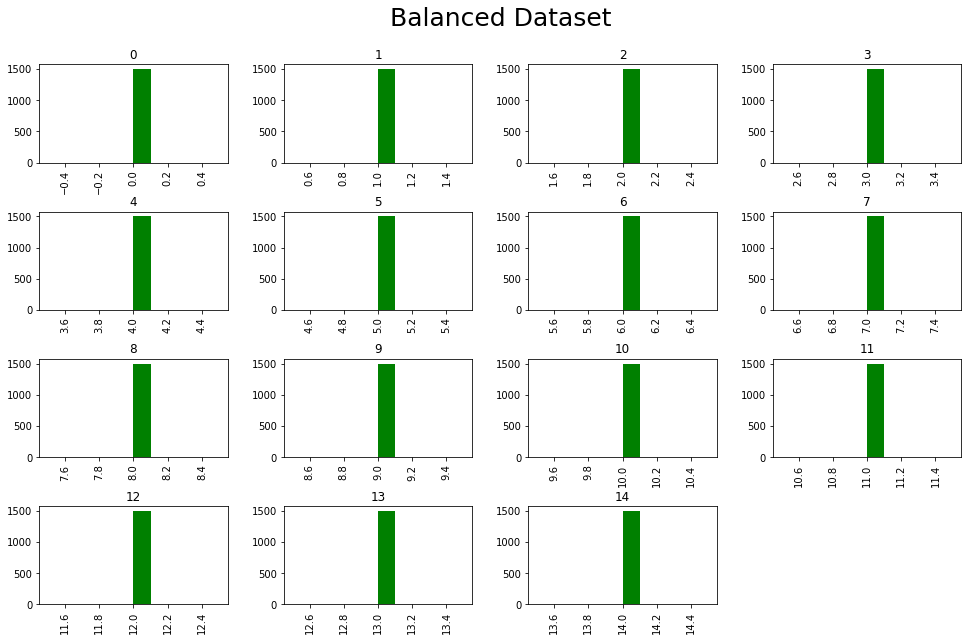

40822

In [0]:
# Unique size of depenedent variable after balancing with figure.
df1.hist(by=' Label',column=' Label',figsize=(16,10),color='g')
plt.suptitle('Balanced Dataset',fontsize=25)
plt.show()
gc.collect()

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15750, 50)
(6750, 50)
(15750,)
(6750,)


### Hyper Tunning

In [0]:
# 1) Decision Tree
from sklearn.tree import DecisionTreeClassifier 
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[None,1,5,10,15],
        'min_samples_split':[2,5,10,15],'max_features':randint(1,500),
        'class_weight':['balanced',None],'presort':[True,False],'ccp_alpha':[0.0,0.5,1.0,1.5,2.0,2.5],
        'min_impurity_decrease':[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],
        'min_impurity_split':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
        'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
        }

def hypertuning_rscv(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(clf, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

random=hypertuning_rscv(clf, params,50, X_smt, y_smt)
random

{'ccp_alpha': 2.5,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 34,
 'min_impurity_decrease': 4.0,
 'min_impurity_split': 0.01,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'splitter': 'best'}

In [0]:
clf=DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=10,
    min_samples_split=30,presort=False,splitter='random',min_weight_fraction_leaf=0.02
    )

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(clf,X_smt,y_smt,cv=kfold)
results

array([0.84355556, 0.93422222, 0.944     , 0.96133333, 0.952     ,
       0.952     , 0.87377778, 0.90044444, 0.92711111, 0.91244444])

In [0]:
# 2) AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME',base_estimator=None,learning_rate=2.0,n_estimators=1, 
                        random_state=40)
ada.fit(X_train,y_train)
accuracy_score(y_test,ada.predict(X_test))

0.12266666666666666

In [0]:
params={'base_estimator':[None,1,5,10,15,20],
        'n_estimators':[50,100,150,200,250,300],
        'learning_rate':[1.0,1.5,2.0,2.5,3.0,3.5,4.0],
        'algorithm':['SAMME.R','SAMME'],
        'random_state':[None,20,30,50,80,100]
       }

def hypertuning_rscv(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

random=hypertuning_rscv(ada, params,50, X_smt, y_smt)
random

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 2.5,
 'n_estimators': 100,
 'random_state': None}

In [0]:
ada1=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=4.0,n_estimators=100, 
                        base_estimator=None)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(ada1,X_smt,y_smt,cv=kfold)
results

array([0.92444444, 0.86044444, 0.83066667, 0.95333333, 0.90088889,
       0.79377778, 0.93733333, 0.79555556, 0.92933333, 0.79066667])

In [0]:
# 3) RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [0]:
rf_p_dist={'max_depth':[3,5,10,None],'n_estimators':[10,100,200,300,400,500],
           'max_features':randint(1,500),'criterion':['gini','entropy'],'bootstrap':[True,False],'min_samples_leaf':randint(1,4),
           'class_weight':['balanced',None],'min_samples_split':[2,5,10,15],
           'min_impurity_split':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
           'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],'oob_score':[True,False],
           'verbose':[0,1,2,3,4,5],'warm_start':[True,False] 
           }

def hypertuning_rscv(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc, param_distributions=p_distr,n_jobs=-1,n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params=rdmsearch.best_params_
    return ht_params

rf_parameters=hypertuning_rscv(rfc,rf_p_dist,40,X_smt,y_smt)
rf_parameters

In [0]:
rfc=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=4,
                            min_samples_leaf=2)

kfold=StratifiedKFold(n_splits=10,random_state=10)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(rfc,X_smt,y_smt,cv=kfold)
results

array([0.78266667, 0.976     , 0.944     , 0.95022222, 0.98711111,
       0.96222222, 0.94088889, 0.92577778, 0.95377778, 0.936     ])

## Implementing All Classifier for selecting best Model

In [0]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)

from sklearn.svm import SVC
svc=SVC(kernel='linear')

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=3.5,n_estimators=100,base_estimator=None)

from xgboost import XGBClassifier
xg=XGBClassifier(base_score=0.5,booster='dart',colsample_bylevel=0.1,colsample_bynode=0.1,colsample_bytree=0.3,gamma=0.1,
                  learning_rate=0.2,n_jobs=1,min_child_weight=3)

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=0.5,fit_prior=False)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='minkowski',n_neighbors=10,p=2,weights='uniform')

from sklearn.ensemble import RandomForestClassifier            
rfc=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=4,min_samples_leaf=2)

from sklearn import tree
clf=tree.DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=10,min_samples_split=30,
                                presort=False,splitter='random',min_weight_fraction_leaf=0.02)

gc.collect()

0

In [0]:
classifier={'MultinomialNB':mnb,'GaussianNB':gnb,'Logistic':lr,'RandomForest':rfc,'Adaboost': ada,
            'XGBoost':xg,'KNeighbors':knn,'SVM':svc,'DecisionTreeClassifier':clf,'SGDClassifier':sgd} 
classifie=sorted(classifier.keys())
print(classifie)
print(type(classifie))
df=pd.DataFrame(classifie,columns=['Classifier'])
df

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'Logistic', 'MultinomialNB', 'RandomForest', 'SGDClassifier', 'SVM', 'XGBoost']
<class 'list'>


,Classifier
0,Adaboost
1,DecisionTreeClassifier
2,GaussianNB
3,KNeighbors
4,Logistic
5,MultinomialNB
6,RandomForest
7,SGDClassifier
8,SVM
9,XGBoost


<Figure size 2160x1800 with 0 Axes>

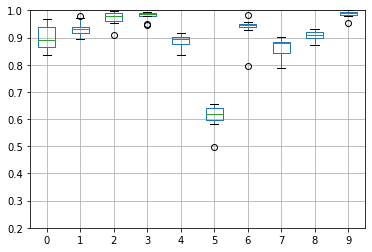

,Adaboost(0),DecisionTree(1),GaussianNB(2),KNeighbors(3),Logistic(4),MultinomialNB(5),RandomForest(6),SGDClassifier(7),SVM(8),XGBoost(9)
0,0.896444,0.940889,0.952889,0.946222,0.870667,0.496000,0.796000,0.786667,0.879556,0.952889
1,0.969333,0.896444,0.997333,0.987111,0.864444,0.602667,0.949778,0.832444,0.906667,0.990667
2,0.869778,0.936444,0.986667,0.981333,0.888000,0.596444,0.946667,0.869778,0.895556,0.982222
3,0.887111,0.970222,0.985333,0.978667,0.901333,0.655556,0.948889,0.882667,0.905333,0.993778
4,0.860889,0.979556,0.990667,0.992889,0.917333,0.644889,0.983111,0.900444,0.920889,0.998667
5,0.955556,0.921333,0.972444,0.992000,0.901333,0.612444,0.958667,0.878667,0.909778,0.999556
6,0.864444,0.915556,0.972444,0.990667,0.911556,0.650667,0.951556,0.883111,0.920889,0.992444
7,0.834667,0.931111,0.992000,0.988889,0.901778,0.623556,0.939111,0.884889,0.931111,0.991111
8,0.918667,0.928444,0.908444,0.987111,0.888000,0.621778,0.944000,0.878222,0.916444,0.996000
9,0.944000,0.912000,0.956889,0.948889,0.837333,0.582667,0.928444,0.818222,0.874222,0.980889


In [0]:
# Predict and Storing Score of each Classifier
parameter=[]
res=[]                                 
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted(classifier.items()):                    # Pick up keys & values present in classifier dictionary.
    kfold=StratifiedKFold(n_splits=10,random_state=None)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
    results=cross_val_score(c,X_smt,y_smt,cv=kfold)       # 10 different Score are store in results variable for each classifier.
    parameter.append((n,[results.mean()]))                # Store Mean of each classifier in a list.
    result=pd.DataFrame(results)                          # Create DataFrame of each Classifier with 10 different score.
    res=pd.concat([res,result],axis=1,ignore_index=True)  # Concatenation two Dataframe into one.

boxplot=res.boxplot(grid=True,figsize=(25,15))            # Draw Box plot for each classifier
boxplot.set_ylim([0.2,1.0])
plt.show()

res.columns=['Adaboost(0)','DecisionTree(1)','GaussianNB(2)','KNeighbors(3)','Logistic(4)','MultinomialNB(5)',
             'RandomForest(6)','SGDClassifier(7)','SVM(8)','XGBoost(9)']    # Provide column name
res                                                       # Show DataFrame

In [0]:
parameter_df=pd.DataFrame.from_dict(dict(parameter),orient='index',columns=['Means'])
parameter_df

,Means
Adaboost,0.900089
DecisionTreeClassifier,0.933200
GaussianNB,0.971511
KNeighbors,0.979378
Logistic,0.888178
MultinomialNB,0.608667
RandomForest,0.934622
SGDClassifier,0.861511
SVM,0.906044
XGBoost,0.987822


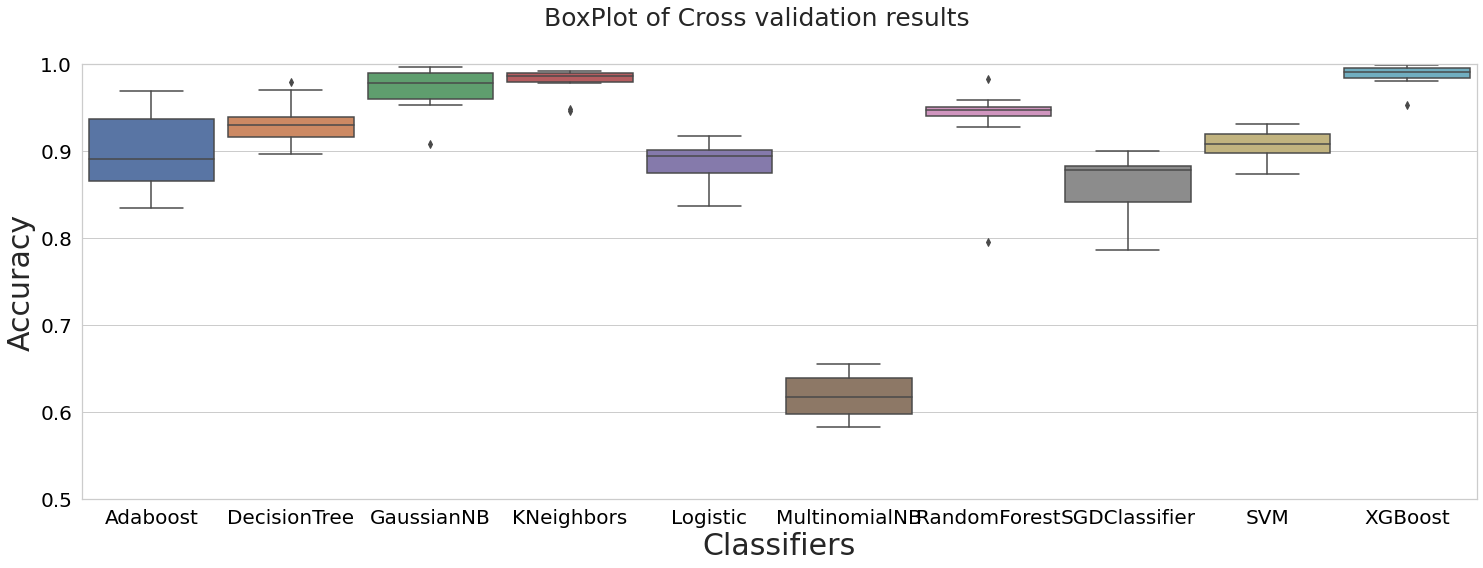

In [0]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.5,1.0])
fig.suptitle('BoxPlot of Cross validation results', fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.savefig('./ids.png',dpi=300)
plt.show()

In [0]:
score = []
i=1
# plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start=time.time()
    c.fit(X_train,y_train)
    pred=c.predict(X_test)
    end=time.time()
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n')
    print("{}) Classifier is : {}\n".format(i,c))
    print("Total time in : ",end-start)

    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test,pred,average='micro'),
                    metrics.recall_score(y_test, pred,average='micro'),metrics.f1_score(y_test,pred,average='micro')]))
    
    print("\nConfusion_matrix is \n",confusion_matrix(y_test,pred))
    precision=print("\nPrecision : ",metrics.precision_score(y_test,pred,average='micro'))      
    recall=print("Recall    : ",metrics.recall_score(y_test,pred,average='micro'))
    f1_score=print("f1_score  : ",metrics.f1_score(y_test,pred,average='micro'))
    
    #print('AUC: %.3f' % auc)
    i=i+1
    print('\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n')                    

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

1) Classifier is : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=3.5,
                   n_estimators=100, random_state=None)

Total time in :  4.450123310089111

Confusion_matrix is 
 [[425   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 454   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 458   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 449   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 451   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 496   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 449   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1 443   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 484   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 459   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 445  

In [0]:
score_df=pd.DataFrame.from_dict(dict(score),orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df                   

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.999704,0.999704,0.999704,0.999704,99.970370
DecisionTreeClassifier,0.949333,0.949333,0.949333,0.949333,94.933333
GaussianNB,0.965333,0.965333,0.965333,0.965333,96.533333
KNeighbors,0.987852,0.987852,0.987852,0.987852,98.785185
Logistic,0.903111,0.903111,0.903111,0.903111,90.311111
MultinomialNB,0.611556,0.611556,0.611556,0.611556,61.155556
RandomForest,0.939704,0.939704,0.939704,0.939704,93.970370
SGDClassifier,0.878815,0.878815,0.878815,0.878815,87.881481
SVM,0.912593,0.912593,0.912593,0.912593,91.259259
XGBoost,0.994222,0.994222,0.994222,0.994222,99.422222


# b) Apply Binary_class Classifier




##** Apply Imbalanced Learning on IDS Datasets

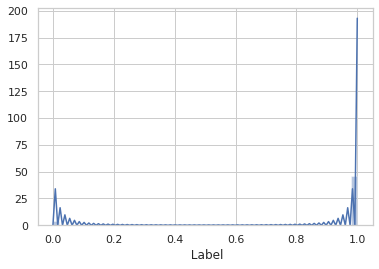

In [0]:
gc.collect()
y1=ids_copy[ids_copy.columns[-1]]
sns.distplot(y1)

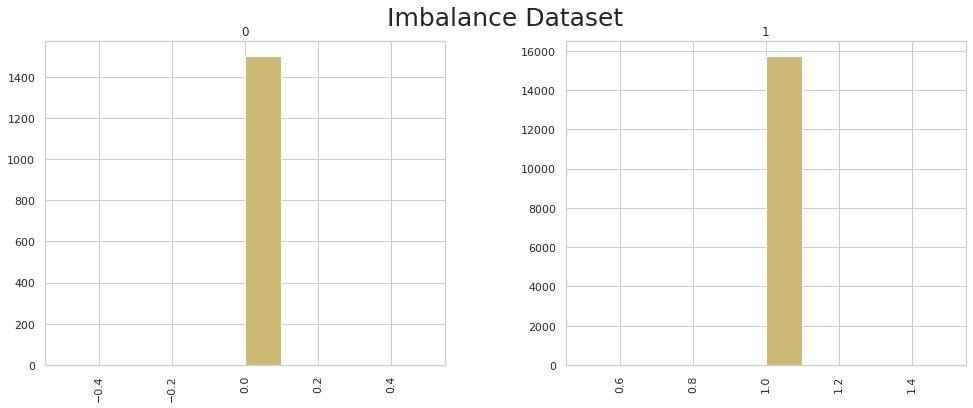

5873

In [0]:
ids_copy.hist(by=' Label',column=' Label',figsize=(16,6),color='y')
plt.suptitle('Imbalance Dataset',fontsize=25)
plt.show()
gc.collect()

1    15720
0     1500
Name:  Label, dtype: int64


2186

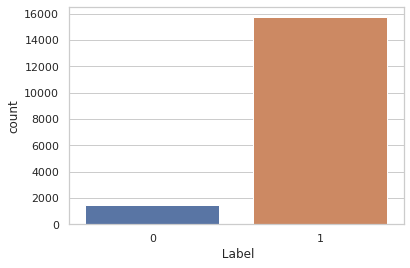

In [0]:
t1=sns.countplot(x=' Label',data=ids_copy)
print(ids_copy[' Label'].value_counts())        
gc.collect()

###2) SMOTETomek   

In [0]:
from imblearn.combine import SMOTETomek    
smt=SMOTETomek(ratio='auto')
X_adas,y_adas=smt.fit_sample(X_update,y1)  # X_update contain top 50 features

In [0]:
df=pd.DataFrame(y_adas)
df.columns=[' Label']
print(df[' Label'].value_counts())

1    15719
0    15719
Name:  Label, dtype: int64


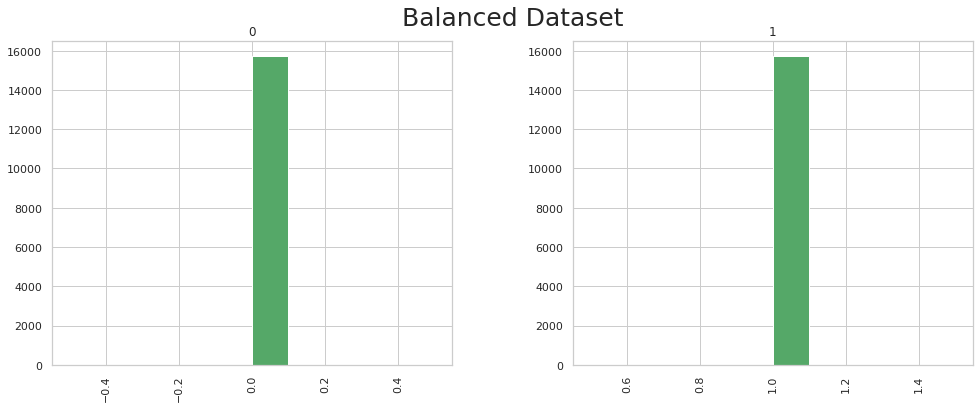

5915

In [0]:
# Unique size of depenedent variable after balancing with figure.
df.hist(by=' Label',column=' Label',figsize=(16,6),color='g')
plt.suptitle('Balanced Dataset',fontsize=25)
plt.show()
gc.collect()

2207

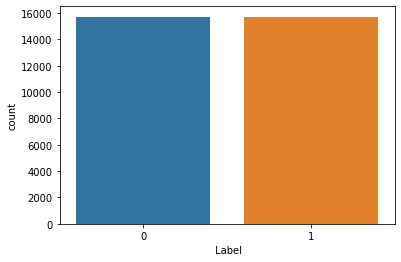

In [0]:
t1=sns.countplot(x=' Label',data=df)       
gc.collect()

#### ** Spliting data into Train_Test

In [0]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_adas,y_adas,test_size=0.3,random_state=42)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(22006, 50)
(9432, 50)
(22006,)
(9432,)


## Hyper Tunning

In [0]:
# 1) SVM 
from sklearn.svm import SVC
svc=SVC()

parameters = [{'C':[1, 10, 100, 1000],'kernel': ['linear'],'shrinking':[True,False],
               'decision_function_shape':['ovo','ovr'],'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1]},
              
              {'C':[1, 10, 100, 1000],'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'shrinking':[True,False]
               ,'decision_function_shape':['ovo','ovr'],'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1]},
              
              {'C':[1, 10, 100, 1000],'kernel':['poly','sigmoid'],'coef0': [0.0, 0.1, 0.5],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30],'shrinking':[True,False],'decision_function_shape':['ovo','ovr']}]

grid_search = GridSearchCV(estimator=svc,param_grid= parameters,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_adas,y_adas)
grid_search.best_params_

In [0]:
# Using RandomizedSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters = [{'C':[1, 10, 100, 1000],'kernel': ['linear'],'shrinking':[True,False],
               'decision_function_shape':['ovo','ovr'],'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1]},
              
              {'C':[1, 10, 100, 1000],'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'shrinking':[True,False]
               ,'decision_function_shape':['ovo','ovr'],'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1]},
              
              {'C':[1, 10, 100, 1000],'kernel':['poly','sigmoid'],'coef0': [0.0, 0.1, 0.5],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30],'shrinking':[True,False],'decision_function_shape':['ovo','ovr']}]


def hypertuning_rscv(rfc,p_distr,nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc,p_distr,n_jobs=-1, n_iter=nbr_iter, cv=5)

    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

rf_parameters=hypertuning_rscv(svc,parameters,40,X_adas,y_adas)
rf_parameters

In [0]:
svc=SVC(C=10,kernel='rbf',decision_function_shape='ovr',gamma=0.2,tol=1e-15)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(svc,X_adas,y_adas,cv=kfold)
results

In [0]:
# 2) RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

dist={'max_depth':[3,5,10,15,20,25,None],
           'criterion':['gini','entropy'],'bootstrap':[True,False],
           'min_samples_split':[2,5,10,15],
           'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],'oob_score':[True,False]
           }

def hypertuning_rscv(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc, param_distributions=p_distr,n_jobs=-1,n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params=rdmsearch.best_params_
    return ht_params

rf_parameters=hypertuning_rscv(rfc,dist,40,X_adas,y_adas)
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'oob_score': True}

In [0]:
rfc=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=5,min_samples_split=5,min_weight_fraction_leaf=0.1,oob_score=True)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(rfc,X_adas,y_adas,cv=kfold)
results

array([0.70992366, 0.8975827 , 0.9379771 , 0.93638677, 0.93543257,
       0.9370229 , 0.94529262, 0.94433842, 0.93827553, 0.94591155])

In [0]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

params={'base_estimator':[None,1,5,10,15,20],
        'n_estimators':[50,100,150,200,250,300],
        'learning_rate':[1.0,1.5,2.0,2.5,3.0,3.5,4.0],
        'algorithm':['SAMME.R','SAMME']
       }

def hypertuning_rscv(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

ada_random=hypertuning_rscv(ada, params,50, X_smt, y_smt)
ada_random

{'algorithm': 'SAMME',
 'base_estimator': None,
 'learning_rate': 2.0,
 'n_estimators': 250}

In [0]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=2.0,n_estimators=250,base_estimator=None)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(ada,X_adas,y_adas,cv=kfold)
results

array([0.51145038, 0.54611959, 0.76081425, 0.75636132, 0.75159033,
       0.74618321, 0.7509542 , 0.7490458 , 0.74864779, 0.76360165])

In [0]:
# 3) Xgboost
from xgboost import XGBClassifier
xgb=xgboost.XGBClassifier()

params={"learning_rate": [0.0,0.5,1.0,1.5,2.0,2.5] ,
        "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
        "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ],
        "booster":['gbtree','gblinear','dart']
        }

def hypertuning_rscv(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

xgb_random=hypertuning_rscv(xgb, params,50, X_adas, y_adas)
xgb_random

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 2.5,
 'max_depth': 6}

In [0]:
xgb1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree',
               colsample_bytree=0.4, gamma=0.2,
              learning_rate=3.0,max_depth=15)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(xgb1,X_adas,y_adas,cv=kfold)
results

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.49984092, 0.50015908])

In [0]:
# 4) DecisionTree
from sklearn.tree import DecisionTreeClassifier 
clf=DecisionTreeClassifier()

params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[None,1,5,10,15],
        'min_samples_split':[2,5,10,15],'min_samples_leaf':[1,1.1,1.2,1.3,2,2.1],
        'class_weight':['balanced',None],'presort':[True,False],'ccp_alpha':[0.0,0.5,1.0,1.5,2.0,2.5],
        'min_weight_fraction_leaf':[0.0,0.5]
        }

def hypertuning(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(clf, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

dtree=hypertuning(clf, params,50, X_adas, y_adas)
dtree

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.5,
 'presort': False,
 'splitter': 'best'}

In [0]:
clf=DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=15,min_samples_split=2,min_samples_leaf=2,
                        presort=False,splitter='best',min_weight_fraction_leaf=0.5)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(clf,X_adas,y_adas,cv=kfold)
results

array([0.42970738, 0.57601781, 0.42652672, 0.46628499, 0.82283715,
       0.74459288, 0.49984092, 0.49984092, 0.49984092, 0.49984092])

In [0]:
# 5) Knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

params={'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,45,50,60,70,80], 
        'n_jobs':[None,-1,1,2],'p':[1,2],
        'n_neighbors':[5,10,40,80],'weights':['distance','uniform']
        }

def hypertuning_rknn(rfc, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(rfc, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    return ht_params

random=hypertuning_rknn(knn, params,50, X_adas, y_adas)
random

ERROR! Session/line number was not unique in database. History logging moved to new session 59


{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'n_jobs': 2,
 'n_neighbors': 40,
 'p': 2,
 'weights': 'distance'}

In [0]:
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30,n_jobs=2, n_neighbors=40, p=2,
                     weights='distance')
kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(knn,X_adas,y_adas,cv=kfold)
results


array([0.5394402 , 0.92080153, 0.9971374 , 0.99395674, 0.99777354,
       0.93861323, 0.92618517, 0.998091  , 0.998091  , 0.9990455 ])

In [0]:
# 6) LogisticRegression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1,class_weight=None,dual=False,fit_intercept=True,
 intercept_scaling=1,max_iter=200,multi_class='auto',n_jobs=1,penalty='l2',
 random_state=40,solver='liblinear',tol=1e-15,verbose=0,warm_start=False)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(lr,X_adas,y_adas,cv=kfold)
results

array([0.53721374, 0.52417303, 0.97137405, 0.97296438, 0.97296438,
       0.97073791, 0.86959288, 0.97964377, 0.9764631 , 0.96183206])

In [0]:
# 7) Gaussian
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=1e-7)
kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(gnb,X_adas,y_adas,cv=kfold)
results

array([0.97360051, 0.76940204, 0.98632316, 0.98759542, 0.98568702,
       0.98664122, 0.84669211, 0.65712468, 0.98886768, 0.98823155])

In [0]:
# 8) SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(penalty='l2',alpha=0.03,fit_intercept=True)
kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(sgd,X_adas,y_adas,cv=kfold)
results

array([0.48854962, 0.53721374, 0.95419847, 0.96310433, 0.95547074,
       0.94083969, 0.93956743, 0.65521628, 0.96564885, 0.99491094])

In [0]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=0.7,fit_prior=False)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(mnb,X_adas,y_adas,cv=kfold)
results

array([0.42716285, 0.45833333, 0.81870229, 0.57569975, 0.91380407,
       0.91475827, 0.78110086, 0.57365574, 0.90264079, 0.89786828])

# Implementing all classifier for Binary_Classification

In [0]:
# from sklearn.svm import SVC                       #### SVM takes more time for running. So i did not use in this model.
# svc=SVC(C=10,kernel='linear',decision_function_shape='ovo',gamma=0.2,tol=1e-15)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=200,
                      multi_class='auto',n_jobs=1,penalty='l2',random_state=40,solver='liblinear',tol=1e-15,
                      verbose=0,warm_start=False)

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=2.0,n_estimators=250,base_estimator=None)

from xgboost import XGBClassifier
xg=XGBClassifier(base_score=0.5, booster='gbtree',colsample_bytree=0.4, gamma=0.2,
                 learning_rate=3.0,max_depth=15)

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=1.0,fit_prior=True)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=1e-7)

from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(penalty='l2',alpha=0.04,fit_intercept=True)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30,n_jobs=2, n_neighbors=40, p=2,
                     weights='distance')

from sklearn.ensemble import RandomForestClassifier            
rfc=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=5,min_samples_split=5,min_weight_fraction_leaf=0.1,oob_score=True)

from sklearn import tree
clf=tree.DecisionTreeClassifier(ccp_alpha=1.0,criterion='gini',max_depth=None,min_samples_split=15,
                                presort=False,splitter='best',min_weight_fraction_leaf=0.1)
                                

In [0]:
classifier={'MultinomialNB':mnb,'GaussianNB':gnb,'Logistic':lr,'RandomForest':rfc,'Adaboost': ada,
            'XGBoost':xg,'KNeighbors':knn,'DecisionTreeClassifier':clf,'SGDClassifier':sgd} 
classifie=sorted(classifier.keys())
print(classifie)
print(type(classifie))
df=pd.DataFrame(classifie,columns=['Classiifier'])
df 

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'Logistic', 'MultinomialNB', 'RandomForest', 'SGDClassifier', 'XGBoost']
<class 'list'>


,Classiifier
0,Adaboost
1,DecisionTreeClassifier
2,GaussianNB
3,KNeighbors
4,Logistic
5,MultinomialNB
6,RandomForest
7,SGDClassifier
8,XGBoost


<Figure size 2160x1800 with 0 Axes>

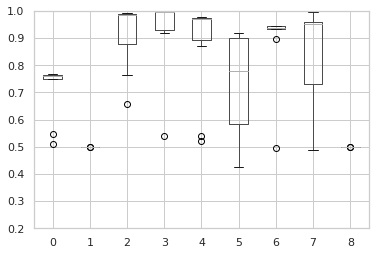

,Adaboost(0),DecisionTree(1),GaussianNB(2),KNeighbors(3),Logistic(4),MultinomialNB(5),RandomForest(6),SGDClassifier(7),XGBoost(8)
0,0.511450,0.500000,0.972010,0.539122,0.540712,0.426845,0.497137,0.487277,0.500000
1,0.546120,0.500000,0.763677,0.919211,0.521947,0.474555,0.895674,0.531170,0.500000
2,0.766539,0.500000,0.991094,0.999046,0.970738,0.779898,0.940204,0.958333,0.500000
3,0.766539,0.500000,0.991730,0.995865,0.976145,0.581107,0.945293,0.955471,0.500000
4,0.749682,0.500000,0.986641,0.998410,0.968830,0.904262,0.937023,0.947201,0.500000
5,0.761132,0.500000,0.983779,0.938613,0.974873,0.918575,0.941476,0.954198,0.500000
6,0.748410,0.500000,0.847646,0.926845,0.869593,0.774809,0.944338,0.939249,0.500000
7,0.763677,0.500000,0.656489,0.998728,0.974555,0.585242,0.945611,0.660941,0.500000
8,0.768692,0.499841,0.989182,0.998727,0.972001,0.904868,0.932549,0.971047,0.499841
9,0.760738,0.499841,0.988546,0.997455,0.969456,0.894050,0.932549,0.994909,0.499841


In [0]:
# Predict and Storing Score of each Classifier
parameter=[]
result1=[]                                 
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
result1=pd.DataFrame(result1)
for n,c in sorted(classifier.items()):                    # Pick up keys & values present in classifier dictionary.
    kfold=StratifiedKFold(n_splits=10,random_state=0)     # Apply StratifiedKFold for Cross_validation of Balanced Data.
    results=cross_val_score(c,X_adas,y_adas,cv=kfold)     # 10 different Score are store in results variable for each classifier.
    parameter.append((n,[results.mean()]))                # Store Mean of each classifier in a list.
    result=pd.DataFrame(results)                          # Create DataFrame of each Classifier with 10 different score.
    result1=pd.concat([result1,result],axis=1,ignore_index=True)  # Concatenation two Dataframe into one.


boxplot=result1.boxplot(grid=True,figsize=(25,15))            # Draw Box plot for each classifier
boxplot.set_ylim([0.2,1.0])
plt.show()

result1.columns=['Adaboost(0)','DecisionTree(1)','GaussianNB(2)','KNeighbors(3)','Logistic(4)','MultinomialNB(5)','RandomForest(6)','SGDClassifier(7)','XGBoost(8)'] # Provide column name
result1                                                       # Show DataFrame

In [0]:
parameter_df=pd.DataFrame.from_dict(dict(parameter),orient='index',columns=['Means'])
parameter_df

,Means
Adaboost,0.714298
DecisionTreeClassifier,0.499968
GaussianNB,0.917079
KNeighbors,0.931202
Logistic,0.873885
MultinomialNB,0.724421
RandomForest,0.891185
SGDClassifier,0.839980
XGBoost,0.499968


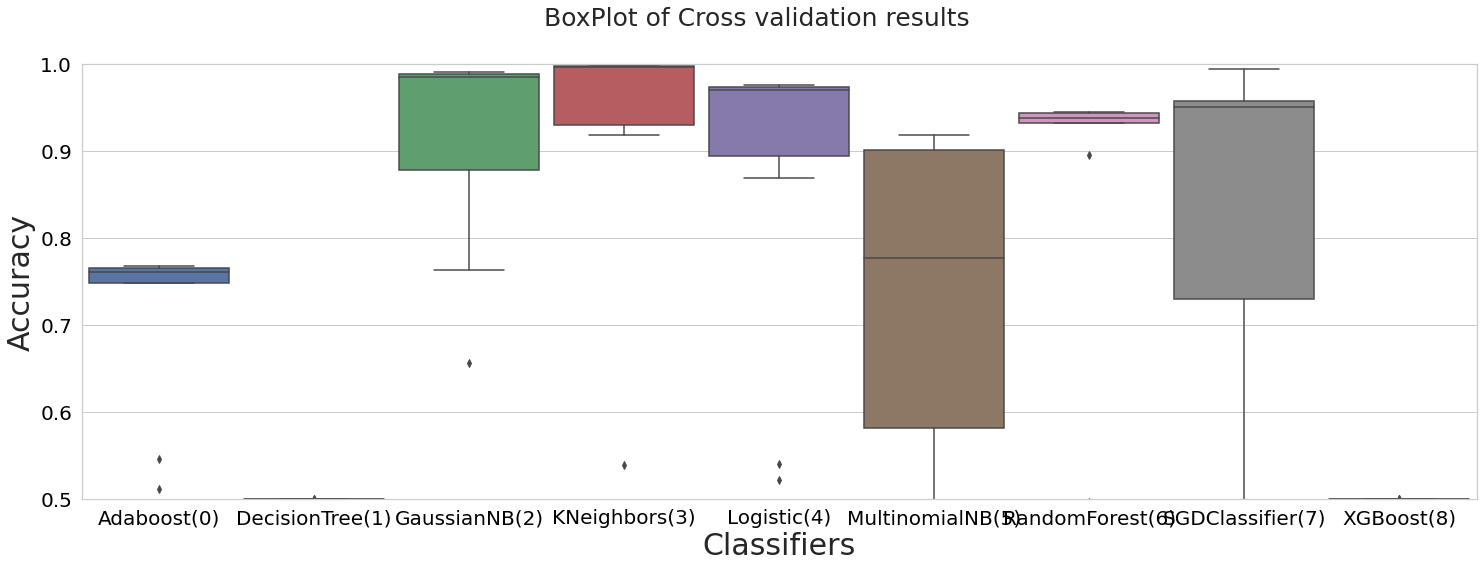

In [0]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=result1,width=0.9)
boxplot.set_ylim([0.5,1.0])
fig.suptitle('BoxPlot of Cross validation results', fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=20)
plt.savefig('./ids_binary.png',dpi=300)
plt.show()

*****************************************************************************************************

1) Classifier is : AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=2.0,
                   n_estimators=250, random_state=None)

Total time in :  2.4614193439483643
Confusion_matrix is 
 [[4687    1]
 [   4 4740]]

Precision :  0.9997890740350137
Recall    :  0.9991568296795953
f1_score  :  0.9994728518713759
AUC: 0.999

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

*****************************************************************************************************

2) Classifier is : DecisionTreeClassifier(ccp_alpha=1.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_wei

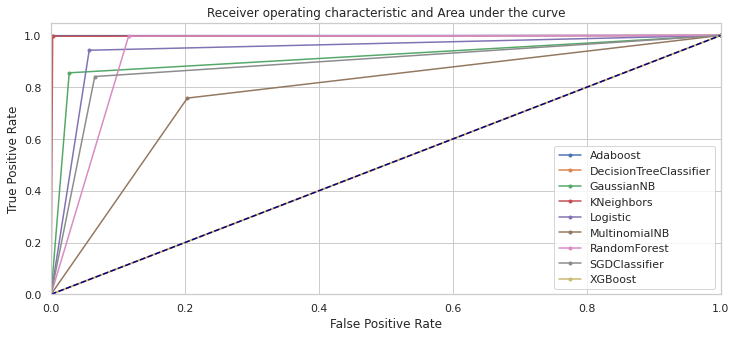

In [0]:
score = []
i=1
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start=time.time()
    c.fit(X1_train,y1_train)
    pred=c.predict(X1_test)
    end=time.time()
    print('*****************************************************************************************************\n')
    print("{}) Classifier is : {}\n".format(i,c))
    print("Total time in : ",end-start)

    score.append((n,[accuracy_score(y1_test,pred,normalize=True),metrics.precision_score(y1_test,pred),
                    metrics.recall_score(y1_test, pred),metrics.f1_score(y1_test,pred)]))
    
    print("Confusion_matrix is \n",confusion_matrix(y1_test,pred))
    precision=print("\nPrecision : ",metrics.precision_score(y1_test,pred))      
    recall=print("Recall    : ",metrics.recall_score(y1_test,pred))
    f1_score=print("f1_score  : ",metrics.f1_score(y1_test,pred))
    
    # ROC AND AUC CURVE                                                             
    fpr,tpr,thresholds=roc_curve(y1_test,pred)
    # calculate AUC
    auc=roc_auc_score(y1_test,pred)
    print('AUC: %.3f' % auc)
    i=i+1
    # print(sns.distplot(y_test-pred))
    # print(plt.scatter(y_test,pred))
    print('\n&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&\n')
    # plot no skill    
    plt.plot(fpr,tpr,marker='.',label=n)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend()
# show the plot
plt.savefig('./ids_Binary.png',dpi=300)
plt.show()                            

In [0]:
score_df=pd.DataFrame.from_dict(dict(score),orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df   

,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.999470,0.999789,0.999157,0.999473,99.946989
DecisionTreeClassifier,0.497031,0.000000,0.000000,0.000000,49.703138
GaussianNB,0.913910,0.969661,0.855607,0.909071,91.391009
KNeighbors,0.997349,0.997680,0.997049,0.997364,99.734945
Logistic,0.942960,0.943671,0.942875,0.943273,94.296014
MultinomialNB,0.777142,0.790330,0.758010,0.773833,77.714165
RandomForest,0.941264,0.897081,0.997681,0.944711,94.126378
SGDClassifier,0.887723,0.928788,0.841273,0.882867,88.772265
XGBoost,0.502969,0.502969,1.000000,0.669300,50.296862


In [0]:
from sklearn.svm import SVC
svc=SVC(C=10,kernel='linear',gamma=0.2,tol=1e-15)
kfold=StratifiedKFold(n_splits=2,random_state=0)      # Apply StratifiedKFold for Cross_validation of Balanced Data.
results=cross_val_score(svc,X_adas,y_adas,cv=kfold)
results